In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
X=dataset.iloc[:,:-1]     #take all the columns except last one
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [9]:
y=dataset.iloc[:,-1]     #take all the columns except last one
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [11]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [43]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEncoder_X=LabelEncoder()
x.iloc[:,0]=labelEncoder_X.fit_transform(x.iloc[:,0])
x

,Const,S1,S2,R&D,Administration,Marketing
0,0,0.0,1.0,165349.20,136897.80,471784.10
1,0,0.0,0.0,162597.70,151377.59,443898.53
2,0,1.0,0.0,153441.51,101145.55,407934.54
3,0,0.0,1.0,144372.41,118671.85,383199.62
4,0,1.0,0.0,142107.34,91391.77,366168.42
5,0,0.0,1.0,131876.90,99814.71,362861.36
6,0,0.0,0.0,134615.46,147198.87,127716.82
7,0,1.0,0.0,130298.13,145530.06,323876.68
8,0,0.0,1.0,120542.52,148718.95,311613.29
9,0,0.0,0.0,123334.88,108679.17,304981.62


In [45]:
onehotencoder=OneHotEncoder(categorical_features=[0])
X=onehotencoder.fit_transform(X).toarray()
X

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [46]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05],
       [0.0000000e+00, 1.0000000e+00, 1.3187690e+05, 9.9814710e+04,
        3.6286136e+05],
       [0.0000000e+00, 0.0000000e+00, 1.3461546e+05, 1.4719887e+05,
        1.2771682e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05],
       [0.0000000e+00, 1.0000000e+00, 1.2054252e+05, 1.4871895e+05,
        3.1161329e+05],
       [0.0000000e+00, 0.0000000e+00, 1.2333488e+05, 1.0867917e+05,
        3.0498162e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0191308e+05, 1.1059411e+05,
        2.29

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#test_size splits 0.8 dataset in train set and 0.2 datset in test dataset
#By default:- test size= train= 3/4(75%) and test=1/4(25%)

In [47]:
X_train

array([[1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05],
       [0.0000000e+00, 1.0000000e+00, 1.2054252e+05, 1.4871895e+05,
        3.1161329e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [0.0000000e+00, 0.0000000e+00, 6.4664710e+04, 1.3955316e+05,
        1.3796262e+05],
       [0.0000000e+00, 0.0000000e+00, 2.8754330e+04, 1.1854605e+05,
        1.7279567e+05],
       [0.0000000e+00, 1.0000000e+00, 7.2107600e+04, 1.2786455e+05,
        3.5318381e+05],
       [0.0000000e+00, 0.0000000e+00, 4.6426070e+04, 1.5769392e+05,
        2.1079767e+05],
       [0.0000000e+00, 1.0000000e+00, 2.0229590e+04, 6.5947930e+04,
        1.8526510e+05],
       [0.0000000e+00, 0.0000000e+00, 4.4069950e+04, 5.1283140e+04,
        1.9702942e+05],
       [1.0000000e+00, 0.0000000e+00, 6.6051520e+04, 1.8264556e+05,
        1.1814820e+05],
       [1.0000000e+00, 0.0000000e+00, 2.7892920e+04, 8.4710770e+04,
        1.64

In [48]:
y_train

4     166187.94
8     152211.77
3     182901.99
25    107404.34
40     78239.91
27    105008.31
34     96712.80
38     81229.06
37     89949.14
28    103282.38
41     77798.83
26    105733.54
39     81005.76
13    134307.35
48     35673.41
30     99937.59
29    101004.64
49     14681.40
12    141585.52
33     96778.92
43     69758.98
17    125370.37
9     149759.96
23    108733.99
20    118474.03
42     71498.49
7     155752.60
14    132602.65
11    144259.40
5     156991.12
19    122776.86
0     192261.83
44     65200.33
22    110352.25
15    129917.04
6     156122.51
10    146121.95
2     191050.39
24    108552.04
46     49490.75
Name: Profit, dtype: float64

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 44359.46779775, 128599.09190752,  98666.58695703, 115274.53922346,
       116571.70605226,  88215.08838215,  95620.50937244,  44218.09400346,
        73144.23144566, 190675.85710411])

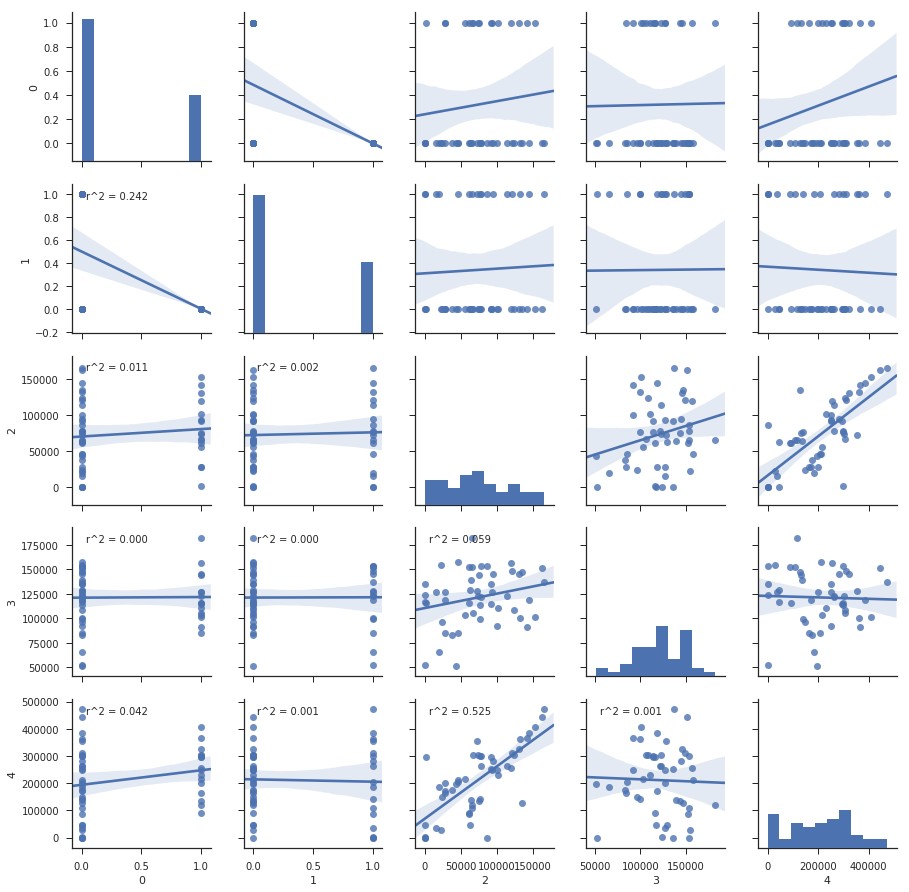

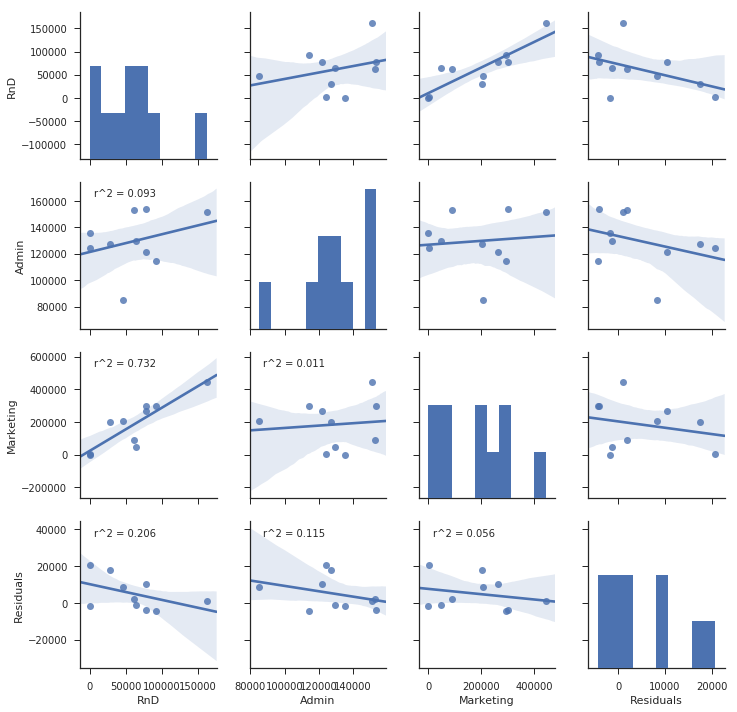

In [22]:
def r_squared(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r^2 = {:.3f}".format(r**2),
                xy=(.1, .9), xycoords=ax.transAxes)

# Check for Linearity visually
linearity_assumption_plot_1 = sns.pairplot(pd.DataFrame(X), kind="reg")
linearity_assumption_plot_1.map_lower(r_squared)

error_residual = pd.DataFrame(y_test-y_pred)
error_residual.reset_index(inplace = True)
linearity_test_df = pd.DataFrame(X_test)
linearity_test_df['Residual'] = error_residual['Profit']
linearity_test_df.columns = 'S1 S2 RnD Admin Marketing Residuals'.split()

linearity_assumption_plot_2 = sns.pairplot(linearity_test_df.iloc[:, 2:], kind="reg")
linearity_assumption_plot_2.map_lower(r_squared)

In [24]:
endogenity_check = linearity_test_df.corr() # Check only the reciduals row with other data
endogenity_check

,S1,S2,RnD,Admin,Marketing,Residuals
S1,1.000000,-0.408248,-0.009848,-0.222340,0.226794,0.103301
S2,-0.408248,1.000000,-0.261081,-0.021940,-0.208567,0.178549
RnD,-0.009848,-0.261081,1.000000,0.305532,0.855484,-0.453653
Admin,-0.222340,-0.021940,0.305532,1.000000,0.102957,-0.339670
Marketing,0.226794,-0.208567,0.855484,0.102957,1.000000,-0.236282
Residuals,0.103301,0.178549,-0.453653,-0.339670,-0.236282,1.000000


In [56]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
print("Variance score: {}".format(r2_score(y_test, y_pred)))

Coefficients: 
 [-4.57177420e+02 -1.40591492e+03  8.34987332e-01 -3.38656646e-02
  2.49821726e-02]
Intercept: 
 48945.79044169108
Mean squared error: 2009187521.7073216
Variance score: 0.1838930492967562


GENERAL EQUATION:- Y= B0+B1x1+B2x2+B3x3+B4x4+B5x5

EQUATION:- 
Y=-48945.79044169108 -4.57177420e+02 S1 -1.40591492e+03 S2 +8.34987332e-01 R&D -3.38656646e-02 Administration + 2.49821726e-02 Marketing 

In [52]:
x = sm.add_constant(X)
x = pd.DataFrame(x, columns = 'Const S1 S2 R&D Administration Marketing'.split())
X_opt = x.loc[:, ['Const', 'S1', 'S2', 'R&D', 'Administration', 'Marketing']]
X_opt

,Const,S1,S2,R&D,Administration,Marketing
0,1.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,1.0,0.0,153441.51,101145.55,407934.54
3,1.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,1.0,0.0,142107.34,91391.77,366168.42
5,1.0,0.0,1.0,131876.90,99814.71,362861.36
6,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,1.0,1.0,0.0,130298.13,145530.06,323876.68
8,1.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,0.0,0.0,123334.88,108679.17,304981.62


In [55]:
# Fit the model, according to the OLS (ordinary least squares)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.34e-27
Time:                        10:13:00   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Const           5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
S1               198.7888   3371.007      0.059      0.953   -6595.030    6992.607
S2               -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
R&D                0.8060      0.046     17.369      0.000       0.712       0.900
Administration    -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing          0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
X_opt = x.loc[:, ['Const', 'S1', 'R&D', 'Administration', 'Marketing']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           8.49e-29
Time:                        10:17:36   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Const           5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
S1               220.1585   2900.536      0.076      0.940   -5621.821    6062.138
R&D                0.8060      0.046     17.606      0.000       0.714       0.898
Administration    -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing          0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X_opt = x.loc[:, ['Const', 'R&D', 'Administration', 'Marketing']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.53e-30
Time:                        09:30:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Const           5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
X_opt = x.loc[:, ['Const', 'R&D', 'Marketing']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.16e-31
Time:                        09:30:35   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X_opt = x.loc[:, ['Const', 'R&D']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.50e-32
Time:                        09:30:49   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""